In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from bs4 import BeautifulSoup
import requests
import io
from functools import reduce

In [144]:
from google.colab import files

In [145]:
uploaded = files.upload()

Saving 2016 rank.csv to 2016 rank.csv
Saving 2016 scores.csv to 2016 scores.csv
Saving 2017 rank.csv to 2017 rank.csv
Saving 2017 scores.csv to 2017 scores.csv
Saving 2018 rank.csv to 2018 rank.csv
Saving 2018 scores.csv to 2018 scores.csv
Saving 2019 rank.csv to 2019 rank.csv
Saving 2019 scores.csv to 2019 scores.csv
Saving 2020 rank.csv to 2020 rank.csv
Saving 2020 scores.csv to 2020 scores.csv
Saving 2021 rank.csv to 2021 rank.csv
Saving 2021 scores.csv to 2021 scores.csv


import it into a dataframe

In [239]:
rank_2016 = pd.read_csv(io.BytesIO(uploaded['2016 rank.csv']))
scores_2016 = pd.read_csv(io.BytesIO(uploaded['2016 scores.csv']))
rank_2017 = pd.read_csv(io.BytesIO(uploaded['2017 rank.csv']))
scores_2017 = pd.read_csv(io.BytesIO(uploaded['2017 scores.csv']))
rank_2018 = pd.read_csv(io.BytesIO(uploaded['2018 rank.csv']))
scores_2018 = pd.read_csv(io.BytesIO(uploaded['2018 scores.csv']))
rank_2019 = pd.read_csv(io.BytesIO(uploaded['2019 rank.csv']))
scores_2019 = pd.read_csv(io.BytesIO(uploaded['2019 scores.csv']))
rank_2020 = pd.read_csv(io.BytesIO(uploaded['2020 rank.csv']))
scores_2020 = pd.read_csv(io.BytesIO(uploaded['2020 scores.csv']))
rank_2021 = pd.read_csv(io.BytesIO(uploaded['2021 rank.csv']))
scores_2021 = pd.read_csv(io.BytesIO(uploaded['2021 scores.csv']))


Merge my scores and rank for each year

In [240]:
merged_2016= pd.merge(rank_2016, scores_2016,on= "Rank")
merged_2017= pd.merge(rank_2017, scores_2017,on= "Rank")
merged_2018= pd.merge(rank_2018, scores_2018,on= "Rank")
merged_2019= pd.merge(rank_2019, scores_2019,on= "Rank")
merged_2020= pd.merge(rank_2020, scores_2020,on= "Rank")
merged_2021= pd.merge(rank_2021, scores_2021,on= "Rank")

In [241]:
merged_2016.head(5)

,Rank,NameCountry/Region_x,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio,NameCountry/Region_y,Overall,Teaching,Research,Citations,Industry Income,International Outlook
0,1,California Institute of TechnologyUnited State...,"2,243",6.9,26%,33 : 67,California Institute of TechnologyUnited State...,95.2,95.6,97.6,99.8,97.8,64.0
1,2,University of OxfordUnited KingdomCoursesEnqui...,"19,919",11.6,34%,46:54:00,University of OxfordUnited KingdomCoursesEnqui...,94.2,86.5,98.9,98.8,73.1,94.4
2,3,Stanford UniversityUnited StatesCoursesExplore,"15,596",7.8,22%,42:58:00,Stanford UniversityUnited StatesCoursesExplore,93.9,92.5,96.2,99.9,63.3,76.3
3,4,University of CambridgeUnited KingdomCoursesEn...,"18,812",11.8,34%,46:54:00,University of CambridgeUnited KingdomCoursesEn...,92.8,88.2,96.7,97.0,55,91.5
4,5,Massachusetts Institute of TechnologyUnited St...,"11,074",9.0,33%,37 : 63,Massachusetts Institute of TechnologyUnited St...,92,89.4,88.6,99.7,95.4,84.0


Inserting the year Column for each data

In [261]:
merged_2016['Year'] = 2016
merged_2017['Year'] = 2017
merged_2018['Year'] = 2018
merged_2019['Year'] = 2019
merged_2020['Year'] = 2020
merged_2021['Year'] = 2021

# Note: at the buttom of each data set the ranking had values like 1000+ or 1000-xxxxx.
## i manually filled that to make the job easier

In [262]:
files =[merged_2016,merged_2017,merged_2018,merged_2019, merged_2020,merged_2021]


In [263]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Rank'],
                                            how='outer'), files)


In [264]:
df

,Rank,NameCountry/Region,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio,Rank,NameCountry/Region,Overall,Teaching,Research,Citations,Industry Income,International Outlook,Year,male,female,unknown
0,1,California Institute of TechnologyUnited State...,"2,243",6.9,26%,33 : 67,1,California Institute of TechnologyUnited State...,95.2,95.6,97.6,99.8,97.8,64.0,2016,67,33,None
1,2,University of OxfordUnited KingdomCoursesEnqui...,"19,919",11.6,34%,46:54:00,2,University of OxfordUnited KingdomCoursesEnqui...,94.2,86.5,98.9,98.8,73.1,94.4,2016,54,46,00
2,3,Stanford UniversityUnited StatesCoursesExplore,"15,596",7.8,22%,42:58:00,3,Stanford UniversityUnited StatesCoursesExplore,93.9,92.5,96.2,99.9,63.3,76.3,2016,58,42,00
3,4,University of CambridgeUnited KingdomCoursesEn...,"18,812",11.8,34%,46:54:00,4,University of CambridgeUnited KingdomCoursesEn...,92.8,88.2,96.7,97.0,55,91.5,2016,54,46,00
4,5,Massachusetts Institute of TechnologyUnited St...,"11,074",9.0,33%,37 : 63,5,Massachusetts Institute of TechnologyUnited St...,92,89.4,88.6,99.7,95.4,84.0,2016,63,37,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,1522,Yuan Ze UniversityTaiwanCourses,"8,188",19.7,7%,42:58:00,1522,Yuan Ze UniversityTaiwanCourses,10.3–25.0,18.8,14.1,19.7,50.1,30.9,2021,58,42,00
1522,1523,Yuriy Fedkovych Chernivtsi National University...,"12,616",10.7,0%,57:43:00,1523,Yuriy Fedkovych Chernivtsi National University...,10.3–25.0,17.9,7.7,5.3,33.4,22.2,2021,43,57,00
1523,1524,Zagazig UniversityEgyptCourses,"156,270",24.4,2%,54:46:00,1524,Zagazig UniversityEgyptCourses,10.3–25.0,13.7,7.4,42.3,33.4,40.6,2021,46,54,00
1524,1525,University of ZagrebCroatiaCourses,"59,336",15.3,3%,59:41:00,1525,University of ZagrebCroatiaCourses,10.3–25.0,19.5,13.2,27.2,40.3,34.3,2021,41,59,00


Split Female:Male Ratio

In [265]:
split= df['Female:Male Ratio'].str.split(':', expand = True)

In [266]:
df['male']= split[1]
df['female'] = split[0]
df['unknown'] = split[2]

Fill NA

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7065 entries, 0 to 1525
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       7065 non-null   int64  
 1   NameCountry/Region         7065 non-null   object 
 2   No. of FTE Students        7065 non-null   object 
 3   No. of students per staff  7065 non-null   float64
 4   International Students     7065 non-null   object 
 5   Female:Male Ratio          7065 non-null   object 
 6   Rank                       7065 non-null   int64  
 7   NameCountry/Region         7065 non-null   object 
 8   Overall                    7065 non-null   object 
 9   Teaching                   7065 non-null   float64
 10  Research                   7065 non-null   float64
 11  Citations                  7065 non-null   float64
 12  Industry Income            7065 non-null   object 
 13  International Outlook      7065 non-null   float

In [268]:
df.fillna(method ='ffill', inplace = True)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7065 entries, 0 to 1525
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       7065 non-null   int64  
 1   NameCountry/Region         7065 non-null   object 
 2   No. of FTE Students        7065 non-null   object 
 3   No. of students per staff  7065 non-null   float64
 4   International Students     7065 non-null   object 
 5   Female:Male Ratio          7065 non-null   object 
 6   Rank                       7065 non-null   int64  
 7   NameCountry/Region         7065 non-null   object 
 8   Overall                    7065 non-null   object 
 9   Teaching                   7065 non-null   float64
 10  Research                   7065 non-null   float64
 11  Citations                  7065 non-null   float64
 12  Industry Income            7065 non-null   object 
 13  International Outlook      7065 non-null   float

Replace â€“ character in the DataFrame and any other unwanted character

In [270]:
df.replace('â€“','',inplace=True)

In [271]:
df.replace('CoursesEnquireAdmissions Support','',inplace=True)

In [272]:
df.columns

Index(['Rank', 'NameCountry/Region', 'No. of FTE Students',
       'No. of students per staff', 'International Students',
       'Female:Male Ratio', 'Rank', 'NameCountry/Region', 'Overall',
       'Teaching', 'Research', 'Citations', 'Industry Income',
       'International Outlook', 'Year', 'male', 'female', 'unknown'],
      dtype='object')

## Exploratory Analysis and Visualization
Let's explore the data by visualizing the distribution of values in some columns of the dataset

In [273]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [274]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## No of students per staff and Teaching

In [286]:
df['No. of students per staff'].describe()

count    7065.000000
mean       19.165803
std        20.494866
min         0.600000
25%        12.300000
50%        16.400000
75%        22.200000
max       865.800000
Name: No. of students per staff, dtype: float64

In [288]:
fig = px.scatter(df, 
                 y= 'No. of students per staff', 
                 x='Teaching', 
                 color='Year', 
                 opacity=0.8, 
                 hover_data=['Female:Male Ratio'], 
                 title='Teaching toInternational STudents')
fig.update_traces(marker_size=5)
fig.show()

No of students per staff and Year


In [297]:
px.histogram(df, y='No. of students per staff',x= 'Year', color='Year', title='Student Per Year')

# Overall score to Year

In [317]:
fig = px.histogram(df, 
                   x='Overall', 
                   marginal='box', 
                   color='Year', 
                   title='Overall  Students')
fig.update_layout(bargap=0.1)
fig.show()

# Correlation Coefficeint

In [318]:
df.corr()

,Rank,No. of students per staff,Rank,Teaching,Research,Citations,International Outlook,Year
Rank,1.000000,0.000179,1.000000,-0.684221,-0.741213,-0.850325,-0.602233,0.312451
No. of students per staff,0.000179,1.000000,0.000179,-0.098844,-0.005738,-0.010914,-0.002651,-0.010399
Rank,1.000000,0.000179,1.000000,-0.684221,-0.741213,-0.850325,-0.602233,0.312451
Teaching,-0.684221,-0.098844,-0.684221,1.000000,0.902239,0.556875,0.355669,-0.079113
Research,-0.741213,-0.005738,-0.741213,0.902239,1.000000,0.625178,0.492498,-0.070318
Citations,-0.850325,-0.010914,-0.850325,0.556875,0.625178,1.000000,0.579321,-0.029732
International Outlook,-0.602233,-0.002651,-0.602233,0.355669,0.492498,0.579321,1.000000,-0.014522
Year,0.312451,-0.010399,0.312451,-0.079113,-0.070318,-0.029732,-0.014522,1.000000


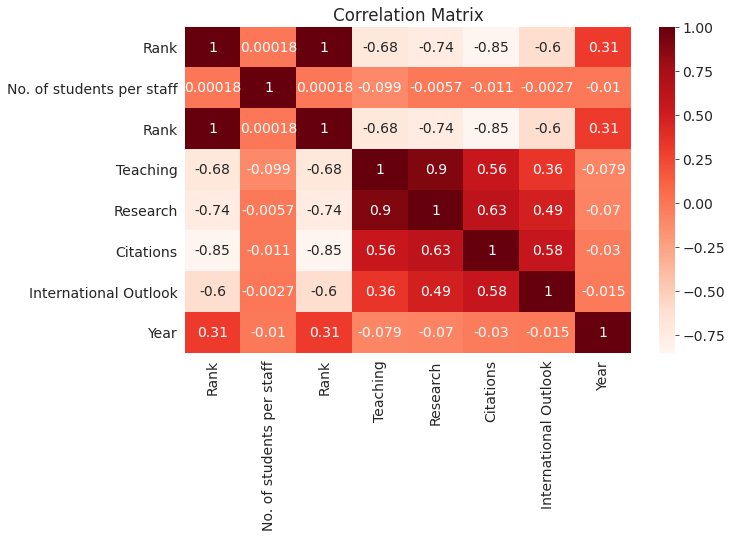

In [319]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [321]:
df.to_csv()

',Rank,NameCountry/Region,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio,Rank,NameCountry/Region,Overall,Teaching,Research,Citations,Industry Income,International Outlook,Year,male,female,unknown\n0,1,California Institute of TechnologyUnited StatesCoursesEnquireAdmissions Support,"2,243",6.9,26%,33 : 67,1,California Institute of TechnologyUnited StatesCoursesEnquireAdmissions Support,95.2,95.6,97.6,99.8,97.8,64.0,2016, 67,33 ,\n1,2,University of OxfordUnited KingdomCoursesEnquireAdmissions Support,"19,919",11.6,34%,46:54:00,2,University of OxfordUnited KingdomCoursesEnquireAdmissions Support,94.2,86.5,98.9,98.8,73.1,94.4,2016,54,46,00\n2,3,Stanford UniversityUnited StatesCoursesExplore,"15,596",7.8,22%,42:58:00,3,Stanford UniversityUnited StatesCoursesExplore,93.9,92.5,96.2,99.9,63.3,76.3,2016,58,42,00\n3,4,University of CambridgeUnited KingdomCoursesEnquireAdmissions Support,"18,812",11.8,34%,46:54:00,4,University of CambridgeUnited KingdomCours